# CMSC 478-ML Homework 4
## By: Pravar Kochar

In [12]:
import timeit
import matplotlib.pyplot as plot
import numpy as np
from tabulate import tabulate

# Include the self made Data class.
from HW4_functions import Data
from HW4_functions import ridge_plot
from IPython.display import display, Latex

# Constants to work on input data correctly.
LINEAR_REGRESSION = False
LOGISTIC_REGRESSION = True

def LOOCV(data, lambda_parameter=None):
    # Simulate the LOOCV method.
    data_est_lst = []
    for leave_idx in range(data.data_count):
        idx_minus_data_theta = data.gradient_descent([leave_idx], lambda_param=lambda_parameter)
        est_data_test = data.resp_pred_test_data(idx_minus_data_theta, [leave_idx])[0]
        data_est_lst.append(est_data_test)
    return data_est_lst

def LOOCVNE(data, lambda_parameter=None):
    # Simulate the LOOCV method.
    data_est_lst = []
    for leave_idx in range(data.data_count):
        idx_minus_data_theta = data.normal_equation([leave_idx], lambda_param=lambda_parameter)
        est_data_test = data.resp_pred_test_data(idx_minus_data_theta, [leave_idx])[0]
        data_est_lst.append(est_data_test)
    return data_est_lst


## Question 1

---
__Question 1__. Consider the dataset cars.csv (same as Homework 1) which has observations for 32 different models of cars
on mileage and 10 other features affecting the mileage. Perform the following tasks

---

In [13]:
# Save results dictionary
param_est = {}
for ques_prefix in ["1a_", "1b"]:
    param_est[ques_prefix+"r2"] = None
    param_est[ques_prefix+"adjr2"] = None
    param_est[ques_prefix+"CVr2"] = None
    param_est[ques_prefix+"CVadjr2"] = None

---
__Question 1a__. Learn a multiple linear hypothesis to predict the car mileage based on the
mean-normalized features using gradient descent algorithm. Report the model parameter estimates.
Calculate the training $R^2$ and Adjusted $R^2$, and the leave-one-out cross-validation $R^2$ and
Adjusted $R^2$. Interpret your results.

---

In [14]:
# Initialize in the data from the .csv file.
car = Data("cars.csv", LINEAR_REGRESSION)

# Scale the features to run GD.
car.scale_features()
# Run the GD.
cars_theta = car.gradient_descent()
car.report_thetas(cars_theta)
estimate_milage = car.resp_prediction(cars_theta)

# Run LOOCV
est_milage_LOO = LOOCV(car)

# Save the R^2's
param_est["1a_r2"] = car.calc_r_squared()
param_est["1a_adjr2"] = car.calc_adj_r_sq()
param_est["1a_CVr2"] = car.calc_r_squared(est_milage_LOO)
param_est["1a_CVadjr2"] = car.calc_adj_r_sq()

print("Data fit measures:")
display(Latex(f"$R^2 = {format(param_est['1a_r2'], '.5f')}$,"
              f"\n$Adjusted-R^2 = {format(param_est['1a_adjr2'], '.5f')}$"))
display(Latex(f"$cross-validation\ R^2 = {format(param_est['1a_CVr2'], '.5f')}$,"
              f"\n$cross-validation\ Adjusted-R^2 = {format(param_est['1a_CVadjr2'], '.5f')}$"))

del car, cars_theta, estimate_milage

Model parameters (Thetas):


<IPython.core.display.Latex object>

Data fit measures:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Interpretation: The model works well on the data, but it is over-fitted on the data as seen with
the cross-validation $R^2$'s being really low in comparison.

---
__Question 1b.__ Learn a multiple linear hypothesis to predict the car mileage based on the mean-normalized features
using gradient descent algorithm with the **regularization parameter value as 6.5**. Report the
model parameter estimates. Calculate the training $R^2$ and Adjusted $R^2$, and the leave-one-out
cross-validation $R^2$ and Adjusted $R^2$. Interpret your results.

---

In [15]:
# Initialize in the data from the .csv file.
car_regularized = Data("cars.csv", LINEAR_REGRESSION)
regu_param = 6.5

# Scale the features to run GD.
car_regularized.scale_features()
# Run the GD.
cars_theta = car_regularized.gradient_descent(lambda_param=regu_param)
car_regularized.report_thetas(cars_theta)
estimate_milage = car_regularized.resp_prediction(cars_theta)

# Run LOOCV
est_milage_LOO = LOOCV(car_regularized, lambda_parameter=regu_param)

# Save the R^2's
param_est["1b_r2"] = car_regularized.calc_r_squared()
param_est["1b_adjr2"] = car_regularized.calc_adj_r_sq()
param_est["1b_CVr2"] = car_regularized.calc_r_squared(est_milage_LOO)
param_est["1b_CVadjr2"] = car_regularized.calc_adj_r_sq()

print("Regularized data fit measures:")
display(Latex(f"$R^2 = {format(param_est['1b_r2'], '.5f')}$,"
              f"\n$Adjusted-R^2 = {format(param_est['1b_adjr2'], '.5f')}$"))
display(Latex(f"$cross-validation\ R^2 = {format(param_est['1b_CVr2'], '.5f')}$,"
              f"\n$cross-validation\ Adjusted-R^2 = {format(param_est['1b_CVadjr2'], '.5f')}$"))

del car_regularized, cars_theta, estimate_milage

Model parameters (Thetas):


<IPython.core.display.Latex object>

Regularized data fit measures:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Interpretation: The model works slightly worse on the given data as GD was regularized. This has
caused the cross validation $R^2$'s to be high values, proving the current model is quite a good
prediction on unknown tests.
and as it's result over-fitting on the data is reduced as seen with the cross-validation $R^2$'s
being significantly higher compared to the over-fitted model in Ques_1a.
Showing how slight regularizing of the parameters can increase the accuracy of the model to solve
 the over-fitting problem.

---
__Question 1c.__ Compare the model parameter estimates, training $R^2$ and Adjusted $R^2$, and the leave-one-out
cross-validation $R^2$ and Adjusted $R^2$ from 1a and 1b. Interpret your result.

---

In [16]:
table_1c = {
    "R^2 values by GDA": ["Training R^2", "Training Adjusted-R^2", "CV-R^2", "CV-Adjusted-R^2"],
    "Normal MLR R^2's": [param_est["1a_r2"], param_est["1a_adjr2"], param_est["1a_CVr2"], param_est["1a_CVadjr2"]],
    "Regularized R^2's": [param_est["1b_r2"], param_est["1b_adjr2"], param_est["1b_CVr2"], param_est["1b_CVadjr2"]]
}
print(tabulate(table_1c, headers="keys", tablefmt="outline", numalign="center"))

+-----------------------+--------------------+---------------------+
| R^2 values by GDA     |  Normal MLR R^2's  |  Regularized R^2's  |
+=======================+====================+=====================+
| Training R^2          |      0.869016      |      0.856439       |
| Training Adjusted-R^2 |      0.815431      |       0.79771       |
| CV-R^2                |      0.653854      |      0.787342       |
| CV-Adjusted-R^2       |      0.512249      |      0.700345       |
+-----------------------+--------------------+---------------------+


The regularized model seems to work slightly worse than the regular MLR by ~0.02, but by running
cross validation on both the model shows that the accuracy on the test data increases by ~0.2
for the regularized model.
This shows that the method of regularization may end up making an accurate predictor by reducing
the over-fitting of the model.

---
__Question 1d.__ Construct a ridge trace plot, using the following values of the regularization parameter
            {0, 0.1, 0.2, 0.3, . . . , 10}
Interpret result.

---

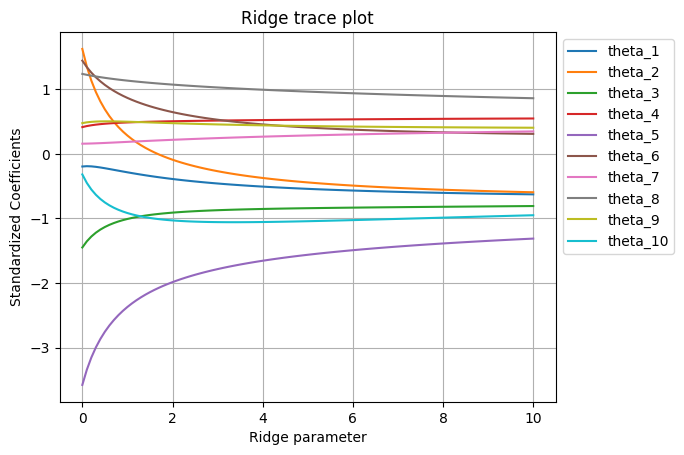

In [17]:
car_regularized = Data("cars.csv", LINEAR_REGRESSION)

# Scale the features to run GD.
car_regularized.scale_features()
ridge_param_lst = [_ / 10 for _ in range(0, 101)]
thetas_lst = []

# Get the 0-10, step 0.1 list of rigid param.
for regularization_param in ridge_param_lst:
    # Run the GD, and save the thetas.
    thetas_lst.append(car_regularized.gradient_descent(lambda_param=regularization_param))

ridge_plot(ridge_param_lst, thetas_lst)

del param_est

Plot interpretation:
    As seen in the Ridge trace plot, the thetas drastically decrease in magnitude until ~2.5 but
    after that they stabilize and don't change much. (stable around 6)
This shows that regularizing the model doesn't affect the theta's after a certain point and hence
 lambda should be kept lower than that point.

---
__Question 1e__. What would be your final choice of the regularization parameter based on the ridge trace plot obtained
in (d)? Discuss your rationale

---

My final choice of regularization parameter would be ~6, since after 6 the theta's don't change
much and hence not much point in increasing the lambda value beyond that point since the
variation in the model estimates wouldn't be much different for the additionally loosen model.

## Question 2

---
__Question 2__. Do all the same things in 1 but with NE.

---

In [18]:
# Save results dictionary
param_est = {}
for ques_prefix in ["2a_", "2b"]:
    param_est[ques_prefix+"r2"] = None
    param_est[ques_prefix+"adjr2"] = None
    param_est[ques_prefix+"CVr2"] = None
    param_est[ques_prefix+"CVadjr2"] = None

---
__Question 2a__. Learn a multiple linear hypothesis to predict the car mileage based on the
mean-normalized features using "Normal Equations". Report the model parameter estimates.
Calculate the training $R^2$ and Adjusted $R^2$, and the leave-one-out cross-validation $R^2$ and
Adjusted $R^2$. Interpret your results.

---

In [19]:
# Initialize in the data from the .csv file.
car = Data("cars.csv", LINEAR_REGRESSION)

# Scale the features to run NE.
car.scale_features()
# Run the NE.
cars_theta = car.normal_equation()
car.report_thetas(cars_theta)
estimate_milage = car.resp_prediction(cars_theta)

# Run LOOCVNE (LOOCV Normal Equation version)
est_milage_LOO = LOOCVNE(car)

# Save the R^2's
param_est["2a_r2"] = car.calc_r_squared()
param_est["2a_adjr2"] = car.calc_adj_r_sq()
param_est["2a_CVr2"] = car.calc_r_squared(est_milage_LOO)
param_est["2a_CVadjr2"] = car.calc_adj_r_sq()

print("Data fit measures:")
display(Latex(f"$R^2 = {format(param_est['2a_r2'], '.5f')}$,"
              f"\n$Adjusted-R^2 = {format(param_est['2a_adjr2'], '.5f')}$"))
display(Latex(f"$cross-validation\ R^2 = {format(param_est['2a_CVr2'], '.5f')}$,"
              f"\n$cross-validation\ Adjusted-R^2 = {format(param_est['2a_CVadjr2'], '.5f')}$"))

del car, cars_theta, estimate_milage


Model parameters (Thetas):


<IPython.core.display.Latex object>

Data fit measures:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

---
__Question 2b.__ Learn a multiple linear hypothesis to predict the car mileage based on the
mean-normalized features using Normal Equations with the **regularization parameter
value as 6.5**. Report the model parameter estimates. Calculate the training $R^2$ and Adjusted
$R^2$, and the leave-one-out cross-validation $R^2$ and Adjusted $R^2$. Interpret your results.

---

In [20]:
# Initialize in the data from the .csv file.
car_regularized = Data("cars.csv", LINEAR_REGRESSION)
regu_param = 6.5

# Scale the features to run NE.
car_regularized.scale_features()
# Run the NE.
cars_theta = car_regularized.normal_equation(lambda_param=regu_param)
car_regularized.report_thetas(cars_theta)
estimate_milage = car_regularized.resp_prediction(cars_theta)

# Run LOOCVNE
est_milage_LOO = LOOCVNE(car_regularized, lambda_parameter=regu_param)

# Save the R^2's
param_est["2b_r2"] = car_regularized.calc_r_squared()
param_est["2b_adjr2"] = car_regularized.calc_adj_r_sq()
param_est["2b_CVr2"] = car_regularized.calc_r_squared(est_milage_LOO)
param_est["2b_CVadjr2"] = car_regularized.calc_adj_r_sq()

print("Regularized data fit measures:")
display(Latex(f"$R^2 = {format(param_est['2b_r2'], '.5f')}$,"
              f"\n$Adjusted-R^2 = {format(param_est['2b_adjr2'], '.5f')}$"))
display(Latex(f"$cross-validation\ R^2 = {format(param_est['2b_CVr2'], '.5f')}$,"
              f"\n$cross-validation\ Adjusted-R^2 = {format(param_est['2b_CVadjr2'], '.5f')}$"))

del car_regularized, cars_theta, estimate_milage

Model parameters (Thetas):


<IPython.core.display.Latex object>

Regularized data fit measures:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Interpretation: The model works slightly worse on the given data as NE was regularized. This has
caused the cross validation $R^2$'s to be higher values, proving the current model is a good
predictor on unknown tests.
As a result over-fitting on the data is reduced as seen with the cross-validation $R^2$'s
being significantly higher compared to the over-fitted model in Ques_2a.
Showing how slight regularizing of the parameters can increase the accuracy of the model to solve
 the over-fitting problem.

---
__Question 2c.__ Compare the model parameter estimates, training $R^2$ and Adjusted $R^2$, and the leave-one-out
cross-validation $R^2$ and Adjusted $R^2$ from 1a and 1b. Interpret your result.

---

In [21]:
table_2c = {
    "R^2 values by NE": ["Training R^2", "Training Adjusted-R^2", "CV-R^2", "CV-Adjusted-R^2"],
    "Normal MLR R^2's": [param_est["2a_r2"], param_est["2a_adjr2"], param_est["2a_CVr2"], param_est["2a_CVadjr2"]],
    "Regularized R^2's": [param_est["2b_r2"], param_est["2b_adjr2"], param_est["2b_CVr2"], param_est["2b_CVadjr2"]]
}
print(tabulate(table_2c, headers="keys", tablefmt="outline", numalign="center"))

+-----------------------+--------------------+---------------------+
| R^2 values by NE      |  Normal MLR R^2's  |  Regularized R^2's  |
+=======================+====================+=====================+
| Training R^2          |      0.869016      |      0.856441       |
| Training Adjusted-R^2 |      0.815431      |      0.797712       |
| CV-R^2                |      0.653825      |      0.787336       |
| CV-Adjusted-R^2       |      0.512207      |      0.700338       |
+-----------------------+--------------------+---------------------+


The regularized model seems to work slightly worse than the regular NE by ~0.02, but by running
cross validation on both the model shows that the accuracy on the test data increases by ~0.2
for the regularized model.
This shows that the method of regularization may end up making an accurate predictor by reducing
the over-fitting of the model.


---
__Question 2d.__ Construct a ridge trace plot, using the following values of the regularization parameter
            {0, 0.1, 0.2, 0.3, . . . , 10}
Interpret result.

---

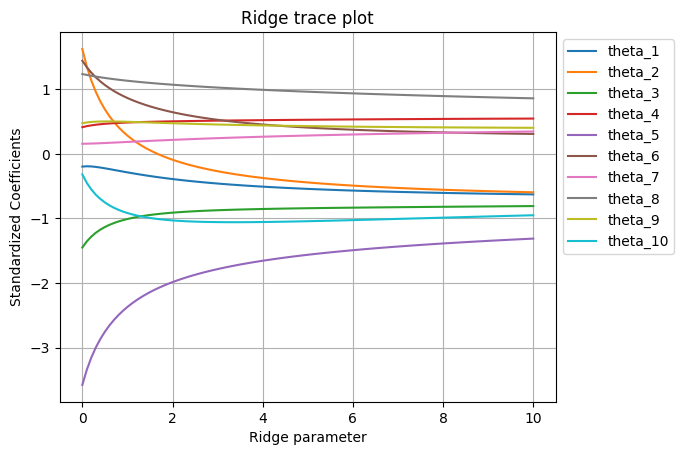

In [22]:
car_regularized = Data("cars.csv", LINEAR_REGRESSION)

# Scale the features to run GD.
car_regularized.scale_features()
ridge_param_lst = [_ / 10 for _ in range(0, 101)]
thetas_lst = []

# Get the 0-10, step 0.1 list of rigid param.
for regularization_param in ridge_param_lst:
    # Run the NE, and save the thetas.
    thetas_lst.append(car_regularized.normal_equation(lambda_param=regularization_param))

ridge_plot(ridge_param_lst, thetas_lst)

del param_est


Plot interpretation:
    As seen in the Ridge trace plot, the thetas drastically decrease in magnitude until ~2.5 but
    after that they stabilize and don't change much. (stable around 6)
This shows that regularizing the model doesn't affect the theta's after a certain point and hence
 lambda should be kept lower than that point.


---
__Question 2e__. What would be your final choice of the regularization parameter based on the ridge trace plot obtained
in (d)? Discuss your rationale

---

My final choice of regularization parameter would be ~6, since after 6 the theta's don't change
much and hence not much point in increasing the lambda value beyond that point since the
variation in the model estimates wouldn't be much different for the additionally loosen model.
